In [1]:
%matplotlib notebook

In [2]:
%load_ext autoreload

%autoreload 2

# Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('pulsar_data_train.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0
4,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0


In [5]:
pip install -U scikit-multiflow

Requirement already up-to-date: scikit-multiflow in /Users/venoligamage/Documents/FYP/Implementation/Asips/scikit-multiflow/src (0.6.dev0)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = "NaN", strategy = "mean")

In [7]:
imputer = SimpleImputer(strategy="most_frequent")
print(imputer.fit_transform(dataset))

[[ 1.21156250e+02  4.83729711e+01  3.75484665e-01 ...  7.44987415e+00
   6.51592977e+01  0.00000000e+00]
 [ 7.69687500e+01  3.61755566e+01  7.12897860e-01 ...  9.41465226e+00
   1.02722975e+02  0.00000000e+00]
 [ 1.30585938e+02  5.32295335e+01  1.33408289e-01 ...  8.50836378e+00
   7.40313242e+01  0.00000000e+00]
 ...
 [ 1.16031250e+02  4.32138464e+01  6.63455691e-01 ...  1.70552145e+01
   3.12204325e+02  0.00000000e+00]
 [ 1.35664062e+02  4.99337494e+01 -8.99403060e-02 ...  7.39839490e+00
   6.23340175e+01  0.00000000e+00]
 [ 1.20726562e+02  5.04722564e+01  3.46178079e-01 ...  1.76622219e+01
   3.29548016e+02  0.00000000e+00]]


# Training

In [9]:
#Alrady tested. fast,not incrimently learn, not solve imbalance problem
from skmultiflow.data import FileStream

# 1. Create a stream

stream = FileStream('pulsar_data_train.csv')
#(./name)
print("Features:")
print(stream.feature_names)
print("Number of Targets: " + str(stream.n_targets)+"\nName: "+str(stream.target_names))
print("Target class values: " + str(stream.target_values))


Features:
['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']
Number of Targets: 1
Name: ['target_class']
Target class values: [0, 1]


# 1. ExtremelyFastDecisionTreeClassifier

### 1.1 Hellinger

In [9]:
#fast(not much as ht),incremantly learn, not slove imbalance problem 
from skmultiflow.trees.extremely_fast_decision_tree import ExtremelyFastDecisionTreeClassifier 
import numpy as np
#from skmultiflow.trees.split_criterion import GiniSplitCriterion
from skmultiflow.data import FileStream
#from skmultiflow.trees import ExtremelyFastDecisionTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
# 1. Create a stream
import datetime
start_time = datetime.datetime.now()
stream = FileStream('pulsar_data_train.csv')

efdth = ExtremelyFastDecisionTreeClassifier(split_criterion='hellinger')


print("info: ")
print(efdth.get_info)
# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 9000
wait_samples = 300
y_true_all = []
y_pred_all = []
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = efdth.predict(X)
    if (n_samples > wait_samples):
      y_true_all.append(y[0])
      y_pred_all.append(y_pred[0])
    n_samples += 1
    efdth.partial_fit(X, y)
   
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(efdth.get_info)

info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
                                    memory_estimate_period=1000000,
                                    min_samples_reevaluate=20, nb_threshold=0,
                                    nominal_attributes=None,
                                    split_confidence=1e-07,
                                    split_criterion='hellinger',
                                    stop_mem_management=False,
                                    tie_threshold=0.05)>
9000 samples analyzed.
0:00:39.467753 Time difference
info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
             

### Evaluation Measures

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
def evaluationMesures(y_true_all, y_pred_all): 
  tn, fp, fn, tp = confusion_matrix(y_true_all,y_pred_all).ravel()
  recall = recall_score(y_true_all, y_pred_all)
  precision = precision_score(y_true_all, y_pred_all)
  accuracy = accuracy_score(y_true_all, y_pred_all)
  f1 = f1_score(y_true_all, y_pred_all)
  specificity = tn/(tn + fp)
  G_mean = np.sqrt((recall * specificity))

  print('Accuracy: {0} \nRecall: {1} \nPrecision: {2} \nF1 Score: {3} \nSpecificity(TNR): {4} \nG-Mean: {5}'
      .format(accuracy,recall,precision,f1,specificity,G_mean))

In [9]:
evaluationMesures(y_true_all,y_pred_all)

NameError: name 'y_true_all' is not defined

### 1.2 Gaussian_Hellinger

In [11]:
from skmultiflow.trees.extremely_fast_decision_tree import ExtremelyFastDecisionTreeClassifier 
import datetime
from skmultiflow.evaluation import EvaluatePrequential

start_time = datetime.datetime.now()
stream = FileStream('pulsar_data_train.csv')

efdtgh = ExtremelyFastDecisionTreeClassifier(split_criterion='gaussian_hellinger')


print("info: ")
print(efdtgh.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 9000
wait_samples = 300
y_true_all = []
y_pred_all = []
# Train the estimator with the samples provided by the data stream
# while n_samples < max_samples and stream.has_more_samples():
#     X, y = stream.next_sample()
#     y_pred = efdtgh.predict(X)
#     if (n_samples > wait_samples):
#       y_true_all.append(y[0])
#       y_pred_all.append(y_pred[0])
#     n_samples += 1
#     efdtgh.partial_fit(X, y)


evaluator = EvaluatePrequential(show_plot=False,
                                pretrain_size=300,
                                max_samples=1000,
                               metrics=['kappa','gmean','accuracy','recall','precision','f1','running_time'],
                               n_wait = 1000,
                               output_file="output_file")

evaluator.evaluate(stream=stream, model=efdtgh)


end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(efdtgh.get_info)

ImportError: cannot import name 'asips_utils' from 'skmultiflow.utils.asips_utils' (/Users/venoligamage/Documents/FYP/Implementation/Asips/scikit-multiflow/src/skmultiflow/utils/asips_utils.py)

In [49]:
# for x in :
#     print(x)
print(evaluator.get_current_measurements(model_idx=0).kappa_score())
print(evaluator.get_current_measurements(model_idx=0).geometric_mean_score())
print(evaluator.get_current_measurements(model_idx=0).accuracy_score())
print(evaluator.get_current_measurements(model_idx=0).recall_score())
print(evaluator.get_current_measurements(model_idx=0).precision_score())
print(evaluator.get_current_measurements(model_idx=0).f1_score())
print(evaluator.get_current_measurements(model_idx=0).n_samples)

0.7557338270081247
0.8583950752789521
0.962
0.75
0.8048780487804879
0.7764705882352942
1000


In [51]:
print(evaluator.get_info())

EvaluatePrequential(batch_size=1, data_points_for_classification=False,
                    max_samples=1000, max_time=inf,
                    metrics=['kappa', 'gmean', 'accuracy', 'recall',
                             'precision', 'f1'],
                    n_wait=1000, output_file='output_file', pretrain_size=0,
                    restart_stream=True, show_plot=False)


In [45]:
evaluator = EvaluatePrequential(show_plot=False,
                                pretrain_size=0,
                                max_samples=1000,
                               metrics=['kappa','gmean','accuracy','recall','precision','f1'],
                               n_wait = 1000,
                               output_file="output_file")

evaluator.evaluate(stream=stream, model=efdtgh)


Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [8.08s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.9620
M0 - Kappa        : 0.7557
M0 - Precision: 0.8049
M0 - Recall: 0.7500
M0 - F1 score: 0.7765


[ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                     leaf_prediction='nba',
                                     max_byte_size=33554432,
                                     memory_estimate_period=1000000,
                                     min_samples_reevaluate=20, nb_threshold=0,
                                     nominal_attributes=None,
                                     split_confidence=1e-07,
                                     split_criterion='gaussian_hellinger',
                                     stop_mem_management=False,
                                     tie_threshold=0.05)]

In [46]:
# for x in :
#     print(x)
print(evaluator.get_current_measurements(model_idx=0).kappa_score())
print(evaluator.get_current_measurements(model_idx=0).geometric_mean_score())
print(evaluator.get_current_measurements(model_idx=0).accuracy_score())
print(evaluator.get_current_measurements(model_idx=0).recall_score())
print(evaluator.get_current_measurements(model_idx=0).precision_score())
print(evaluator.get_current_measurements(model_idx=0).f1_score())

0.7557338270081247
0.8583950752789521
0.962
0.75
0.8048780487804879
0.7764705882352942


In [13]:
from skmultiflow.trees.extremely_fast_decision_tree import ExtremelyFastDecisionTreeClassifier 
import datetime

start_time = datetime.datetime.now()
stream = FileStream('pulsar_data_train.csv')

efdtgh = ExtremelyFastDecisionTreeClassifier(split_criterion='gaussian_hellinger')


print("info: ")
print(efdtgh.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 9000
wait_samples = 300
y_true_all = []
y_pred_all = []
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    if (n_samples > wait_samples):
        y_pred = efdtgh.predict(X)
        y_true_all.append(y[0])
        y_pred_all.append(y_pred[0])
    else: 
        efdtgh.predict(X)
        efdtgh.partial_fit(X, y)
    n_samples += 1
    
    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(efdtgh.get_info)

info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
                                    memory_estimate_period=1000000,
                                    min_samples_reevaluate=20, nb_threshold=0,
                                    nominal_attributes=None,
                                    split_confidence=1e-07,
                                    split_criterion='gaussian_hellinger',
                                    stop_mem_management=False,
                                    tie_threshold=0.05)>
9000 samples analyzed.
0:00:00.633612 Time difference
info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
    

In [11]:
evaluationMesures(y_true_all,y_pred_all)

ValueError: not enough values to unpack (expected 4, got 0)

### 1.3 Gini

In [19]:
start_time = datetime.datetime.now()
stream = FileStream('pulsar_data_train.csv')

efdtgini = ExtremelyFastDecisionTreeClassifier(split_criterion='gini')


print("info: ")
print(efdtgini.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 9000
wait_samples = 300
y_true_all = []
y_pred_all = []
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = efdtgini.predict(X)
    if (n_samples > wait_samples):
        y_true_all.append(y[0])
        y_pred_all.append(y_pred[0])
    n_samples += 1
    efdtgini.partial_fit(X, y)

    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(efdtgh.get_info)

info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
                                    memory_estimate_period=1000000,
                                    min_samples_reevaluate=20, nb_threshold=0,
                                    nominal_attributes=None,
                                    split_confidence=1e-07,
                                    split_criterion='gini',
                                    stop_mem_management=False,
                                    tie_threshold=0.05)>
9000 samples analyzed.
0:00:27.381479 Time difference
info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
                  

In [20]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9731003563628003 
Recall: 0.818639798488665 
Precision: 0.8783783783783784 
F1 Score: 0.847457627118644 
Specificity(TNR): 0.9886148007590133 
G-Mean: 0.9318679442558188


# GH-VFDT

In [12]:
from skmultiflow.trees.hoeffding_tree import HoeffdingTreeClassifier
import datetime

start_time = datetime.datetime.now()
stream = FileStream('pulsar_data_train.csv')

ht = HoeffdingTreeClassifier(split_criterion='gaussian_hellinger')


print("info: ")
print(ht.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 9000
wait_samples = 300
y_true_all = []
y_pred_all = []
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = ht.predict(X)
    if (n_samples > wait_samples):
      y_true_all.append(y[0])
      y_pred_all.append(y_pred[0])
    n_samples += 1
    ht.partial_fit(X, y)
    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(ht.get_info)

info: 
<bound method BaseSKMObject.get_info of HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        split_criterion='gaussian_hellinger',
                        stop_mem_management=False, tie_threshold=0.05)>
9000 samples analyzed.
0:00:00.977510 Time difference
info: 
<bound method BaseSKMObject.get_info of HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        spli

In [25]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9589608000919646 
Recall: 0.7770780856423174 
Precision: 0.7741530740276035 
F1 Score: 0.7756128221244499 
Specificity(TNR): 0.9772296015180265 
G-Mean: 0.8697846285408534


### ----------------------------------------------------------------------------------------------------------------------------------

In [21]:
from skmultiflow.trees.extremely_fast_decision_trees import ExtremelyFastDecisionTrees 
ExtremelyFastDecisionTrees()

Main    : before creating thread x

Main    : before creating thread y

Main    : before running thread x

Main    : before running thread y

Main    : wait for the thread to finish
18197 samples analyzed.
Extremely Fast Decision Tree accuracy: 0.973072484475463
info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
                                    memory_estimate_period=1000000,
                                    min_samples_reevaluate=20, nb_threshold=0,
                                    nominal_attributes=None,
                                    split_confidence=1e-07,
                                    split_criterion='hellinger',
                                    stop_mem_management=False,
                                    tie_threshold=0.05)>
18546 samples analyzed.
Extremely Fast Decis

### HoeffdingTreeClassifier

<IPython.core.display.Javascript object>


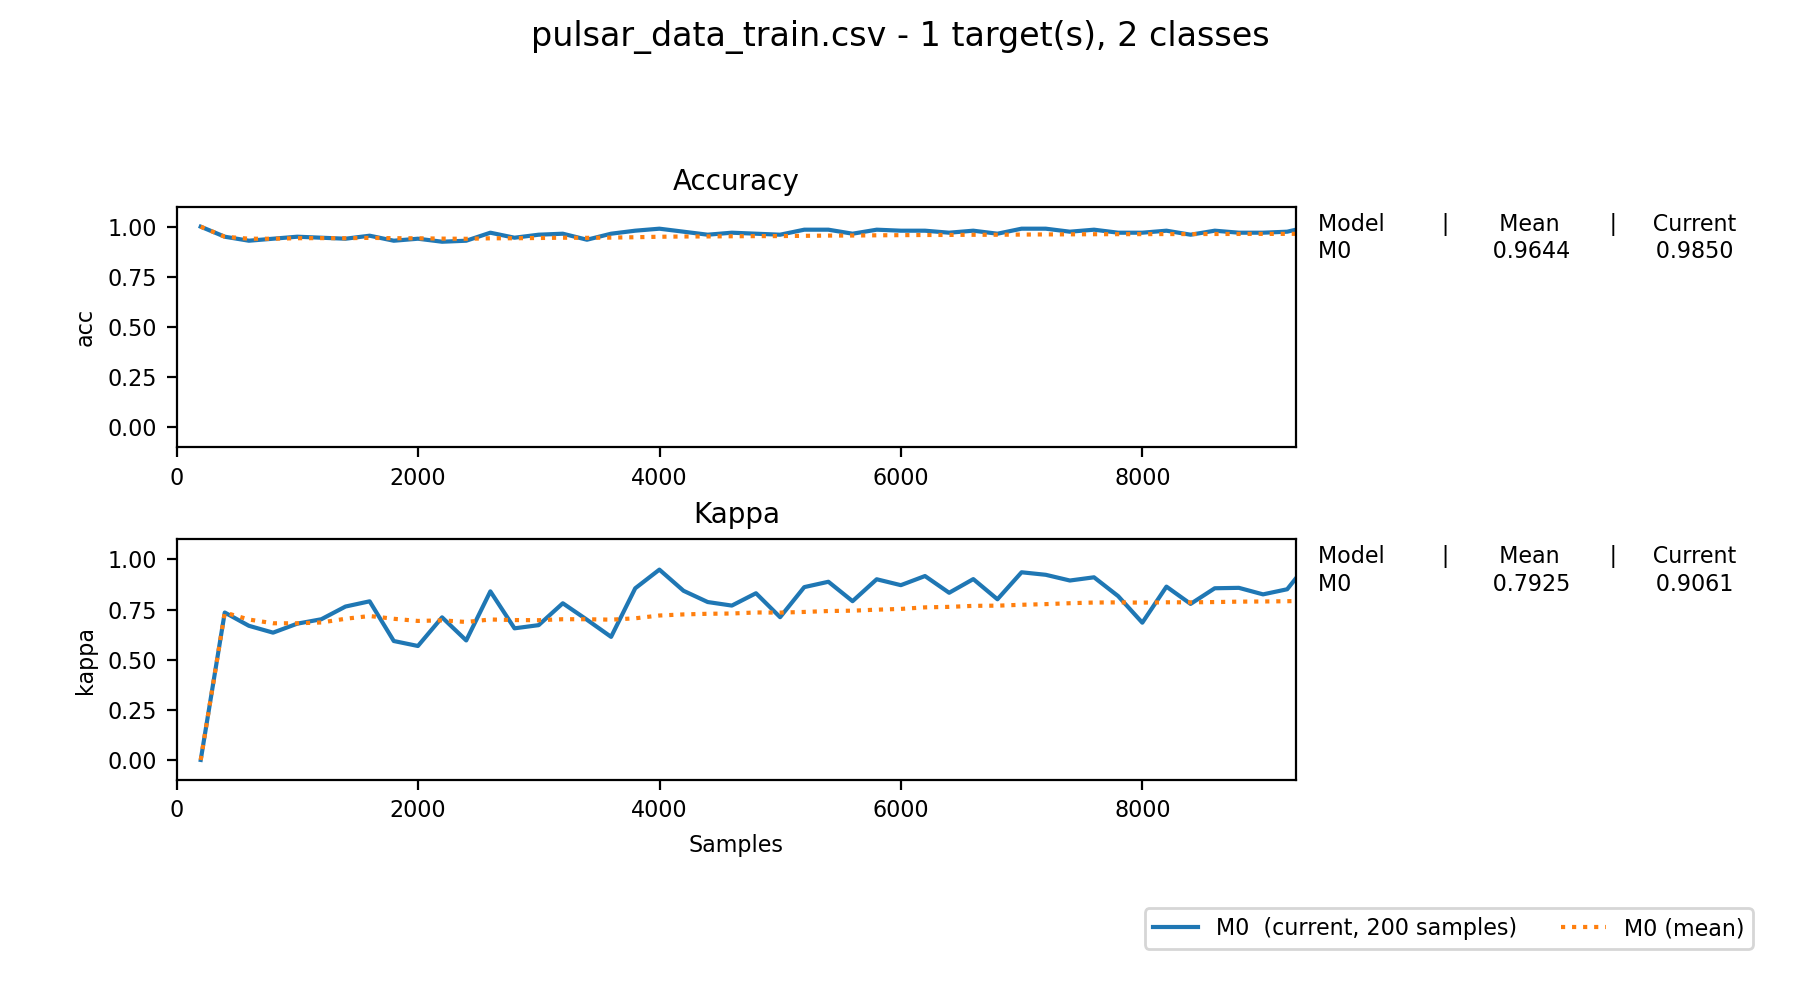

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [1.58s]
Processed samples: 9273
Mean performance:
M0 - Accuracy     : 0.9644
M0 - Kappa        : 0.7925


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [11]:
from skmultiflow.trees.hoeffding_tree import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential

# 2. Instantiate the HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()
# 3. Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=20000)
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=ht)
